In [1]:
#Importing Required Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import scipy
import seaborn as sns

In [2]:
#Importing Dataset and fill the NaN value using pad method
df=pd.read_csv("input_data_quiz.csv")
df.pop("NPD_WELL_BORE_CODE")
df.pop("NPD_WELL_BORE_NAME")

df['ON_STREAM_HRS'] = df['ON_STREAM_HRS'].fillna(method='pad')
df['AVG_DOWNHOLE_PRESSURE'] = df['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')
df['AVG_DOWNHOLE_TEMPERATURE'] = df['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')
df['AVG_DP_TUBING'] = df['AVG_DP_TUBING'].fillna(method='pad')
df['AVG_ANNULUS_PRESS'] = df['AVG_ANNULUS_PRESS'].fillna(method='pad')
df['AVG_CHOKE_SIZE_P'] = df['AVG_CHOKE_SIZE_P'].fillna(method='pad')
df['AVG_WHP_P'] = df['AVG_WHP_P'].fillna(method='pad')
df['AVG_WHT_P'] = df['AVG_WHT_P'].fillna(method='pad')
df['DP_CHOKE_SIZE'] = df['DP_CHOKE_SIZE'].fillna(method='pad')
df['BORE_OIL_VOL'] = df['BORE_OIL_VOL'].fillna(method='pad')
df['BORE_GAS_VOL'] = df['BORE_GAS_VOL'].fillna(method='pad')
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].fillna(method='pad')
df

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0
1,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0
2,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0
3,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0
4,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,24.00,0.000,0.000,54.106,28.866,34.36061,54.106,68.550,25.420,694.0,105168.0,698.0
2496,24.00,0.000,0.000,53.827,29.012,33.65804,53.827,71.856,25.148,692.0,104778.0,697.0
2497,24.00,0.000,0.000,53.484,28.842,34.58774,53.484,71.553,24.808,707.0,106179.0,705.0
2498,24.00,0.000,0.000,53.008,28.691,34.80917,53.008,71.980,24.331,706.0,104809.0,705.0


<AxesSubplot:xlabel='BORE_WAT_VOL'>

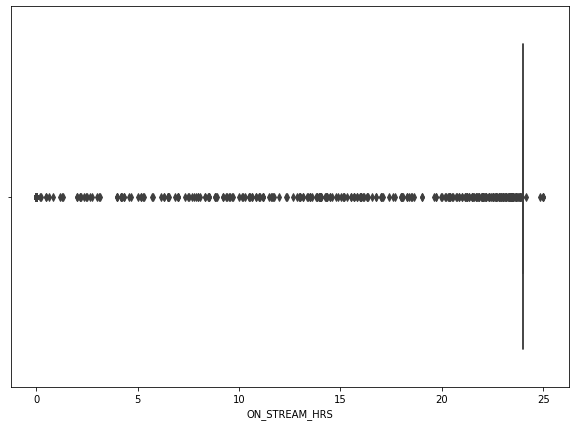

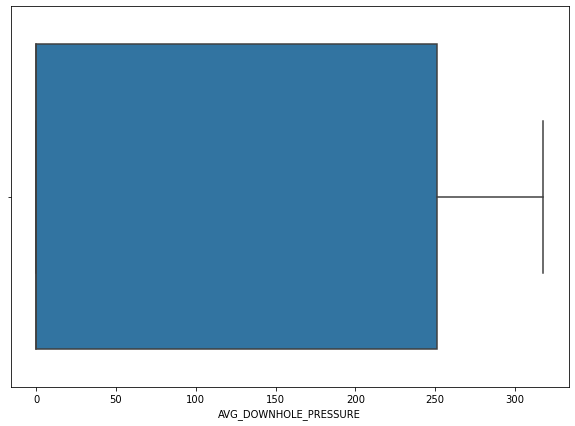

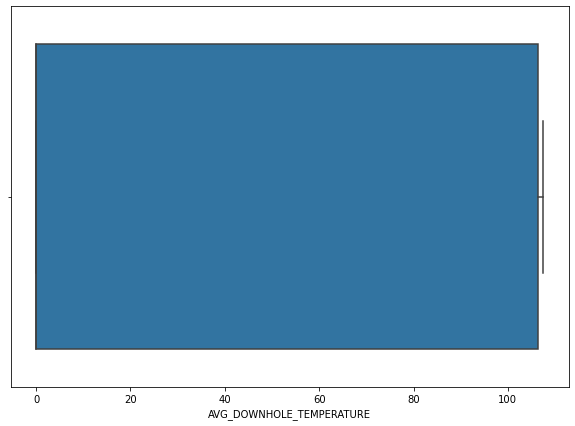

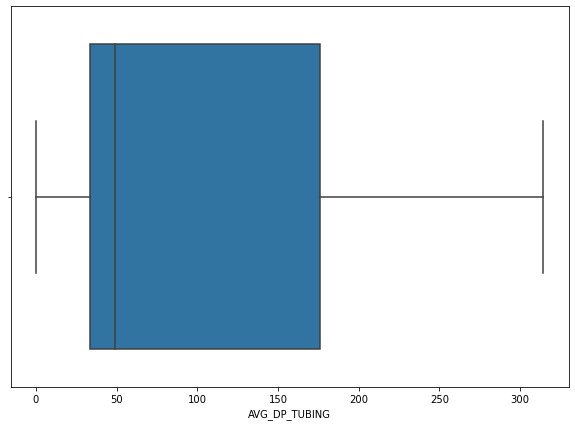

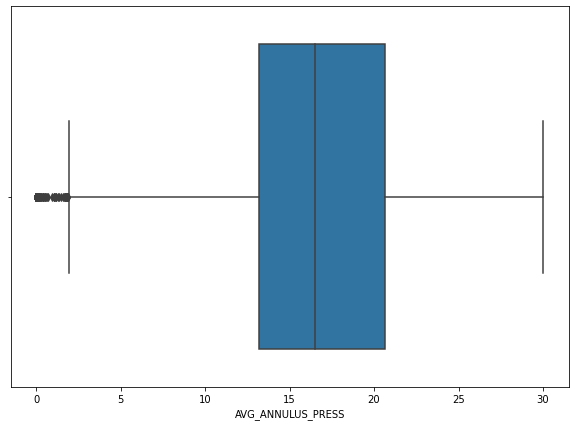

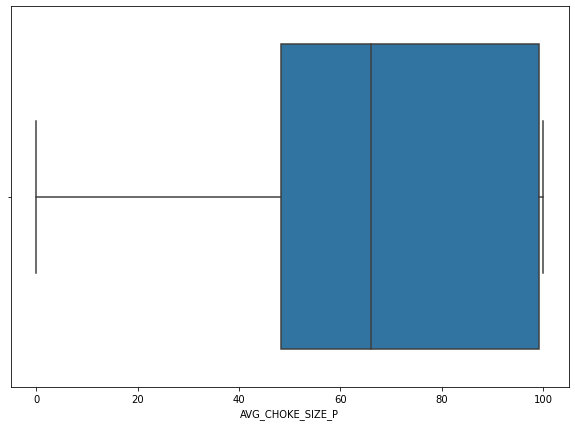

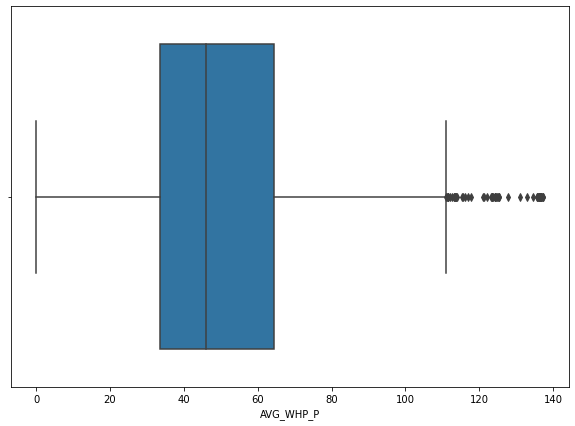

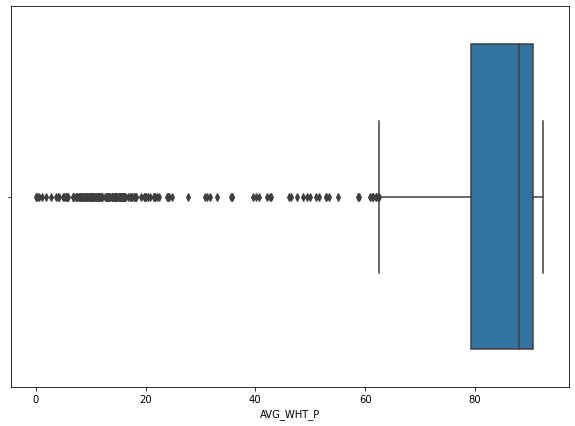

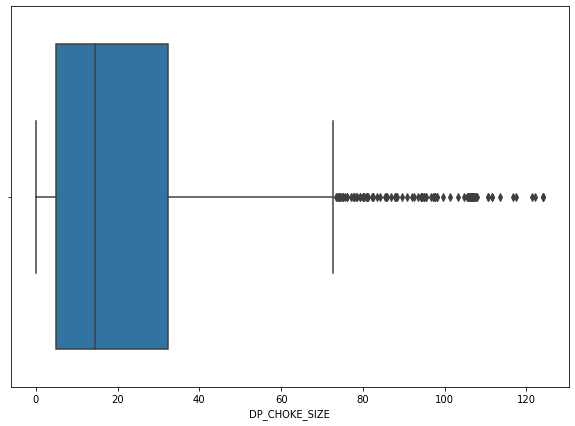

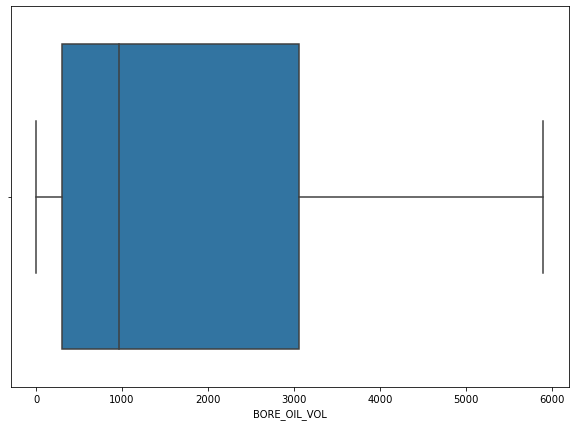

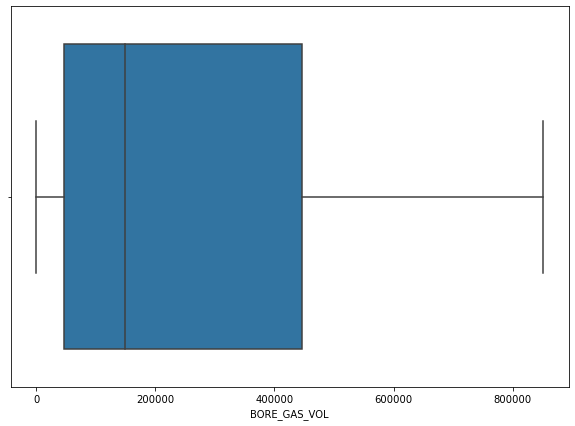

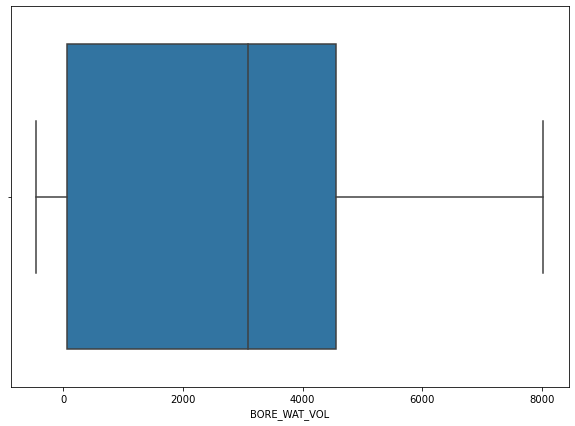

In [3]:
#Boxplot to see outliers
figuresizes = (10,7)
plt.figure(figsize=figuresizes)
sns.boxplot(x = 'ON_STREAM_HRS', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'AVG_DOWNHOLE_PRESSURE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'AVG_DOWNHOLE_TEMPERATURE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'AVG_DP_TUBING', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'AVG_ANNULUS_PRESS', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'AVG_CHOKE_SIZE_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'AVG_WHP_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'AVG_WHT_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'DP_CHOKE_SIZE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'BORE_OIL_VOL', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'BORE_GAS_VOL', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'BORE_WAT_VOL', data=df)

In [4]:
#Conditioning of data and removal of outlires
df=df[df["ON_STREAM_HRS"]>0]

df=df[df["AVG_DP_TUBING"]>0]
df=df[df["AVG_ANNULUS_PRESS"]>0]
df=df[df["AVG_CHOKE_SIZE_P"]>0]
df=df[df["AVG_WHP_P"]>0]
df=df[df["AVG_WHT_P"]>0]
df=df[df["DP_CHOKE_SIZE"]>0]


a=df["DP_CHOKE_SIZE"].quantile(0.95)
a1=df["DP_CHOKE_SIZE"].quantile(0.05)
print(a,a1)

b=df["AVG_WHP_P"].quantile(0.95)
b1=df["AVG_WHP_P"].quantile(0.05)
print(b,b1)

df=df[(df["DP_CHOKE_SIZE"]>a1) & (df["DP_CHOKE_SIZE"]<a)]
df=df[(df["AVG_WHP_P"]>b1) & (df["AVG_WHP_P"]<b)]

df

61.0517 3.4952
93.01995 32.184149999999995


,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
62,21.26,265.611,105.480,181.727,6.660,28.76350,83.884,64.021,56.138,2579.0,413143.0,4.0
68,24.00,262.170,105.787,169.532,11.180,31.48322,92.639,75.046,61.001,2753.0,418499.0,3.0
69,24.00,261.610,105.783,169.285,11.257,31.51978,92.326,74.864,60.689,2752.0,426345.0,3.0
70,24.00,261.115,105.777,168.946,11.160,31.48301,92.169,74.250,60.547,2737.0,422379.0,2.0
71,24.00,260.558,105.771,168.698,11.011,31.48727,91.860,73.584,60.253,2736.0,422115.0,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,24.00,0.000,0.000,54.106,28.866,34.36061,54.106,68.550,25.420,694.0,105168.0,698.0
2496,24.00,0.000,0.000,53.827,29.012,33.65804,53.827,71.856,25.148,692.0,104778.0,697.0
2497,24.00,0.000,0.000,53.484,28.842,34.58774,53.484,71.553,24.808,707.0,106179.0,705.0
2498,24.00,0.000,0.000,53.008,28.691,34.80917,53.008,71.980,24.331,706.0,104809.0,705.0


In [5]:
# correlation Between Parameters
df.corr()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
ON_STREAM_HRS,1.000000,0.097280,0.100651,0.093713,0.197928,0.350585,0.049089,0.195643,0.039542,0.214658,0.222679,0.211686
AVG_DOWNHOLE_PRESSURE,0.097280,1.000000,0.995808,0.990101,0.076593,-0.467410,0.806824,-0.478374,0.780031,0.850015,0.845790,-0.742054
AVG_DOWNHOLE_TEMPERATURE,0.100651,0.995808,1.000000,0.983600,0.057555,-0.455320,0.797394,-0.494230,0.769551,0.872903,0.866902,-0.761352
AVG_DP_TUBING,0.093713,0.990101,0.983600,1.000000,0.165720,-0.500306,0.793382,-0.481804,0.762376,0.827968,0.822719,-0.730179
AVG_ANNULUS_PRESS,0.197928,0.076593,0.057555,0.165720,1.000000,-0.179992,0.043660,0.090507,0.013687,-0.014831,-0.019298,0.038414
AVG_CHOKE_SIZE_P,0.350585,-0.467410,-0.455320,-0.500306,-0.179992,1.000000,-0.742965,0.672430,-0.739658,-0.382538,-0.384666,0.736329
AVG_WHP_P,0.049089,0.806824,0.797394,0.793382,0.043660,-0.742965,1.000000,-0.705482,0.995057,0.756328,0.762637,-0.845229
AVG_WHT_P,0.195643,-0.478374,-0.494230,-0.481804,0.090507,0.672430,-0.705482,1.000000,-0.725190,-0.472865,-0.467710,0.782877
DP_CHOKE_SIZE,0.039542,0.780031,0.769551,0.762376,0.013687,-0.739658,0.995057,-0.725190,1.000000,0.719166,0.725686,-0.835939
BORE_OIL_VOL,0.214658,0.850015,0.872903,0.827968,-0.014831,-0.382538,0.756328,-0.472865,0.719166,1.000000,0.998430,-0.785365


In [6]:
#selecting input and output
""" Here we have selected the input parameters are ON_STREAM_HRS, DP_CHOKE_SIZE, AVG_DP_TUBING, AVG_WHP_P, BORE_GAS_VOL and
BORE_WAT_VOL for calculation of the BORE_OIL_VOL because pressure and temperature data are mostaly zero for large no. of observation
and also for test data, these values are zero."""

X=df[["ON_STREAM_HRS","DP_CHOKE_SIZE","AVG_DP_TUBING","AVG_WHP_P","BORE_GAS_VOL","BORE_WAT_VOL"]]
y=df["BORE_OIL_VOL"]

In [7]:
#standardization of input data
from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler()

new_X = scal.fit_transform(X)

In [8]:
new_X.shape
y.shape

(2017,)

In [9]:
Final_X = pd.DataFrame(new_X, index=X.index, columns=X.columns)
Final_X.shape

(2017, 6)

In [10]:
X = Final_X.dropna()
X.shape

(2017, 6)

In [11]:
X

,ON_STREAM_HRS,DP_CHOKE_SIZE,AVG_DP_TUBING,AVG_WHP_P,BORE_GAS_VOL,BORE_WAT_VOL
62,0.846533,0.915429,0.725091,0.853191,0.485404,0.054494
68,0.958966,1.000000,0.665959,0.997689,0.491697,0.054376
69,0.958966,0.994574,0.664761,0.992523,0.500915,0.054376
70,0.958966,0.992105,0.663117,0.989932,0.496256,0.054258
71,0.958966,0.986992,0.661915,0.984832,0.495945,0.052371
...,...,...,...,...,...,...
2495,0.958966,0.381222,0.106269,0.361716,0.123563,0.136353
2496,0.958966,0.376491,0.104916,0.357111,0.123104,0.136235
2497,0.958966,0.370578,0.103253,0.351450,0.124750,0.137179
2498,0.958966,0.362283,0.100945,0.343594,0.123141,0.137179


In [12]:
#spliting the data for validation purpose
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
x_test.shape

(404, 6)

In [13]:
# linear regression and Random forest alorithm
model=LinearRegression()
model.fit(x_train,y_train)
ram=RandomForestRegressor()
ram.fit(x_train,y_train)

RandomForestRegressor()

In [14]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
result = sm.OLS(y_train,x_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           BORE_OIL_VOL   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.191e+05
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:11:00   Log-Likelihood:                -9419.6
No. Observations:                1613   AIC:                         1.885e+04
Df Residuals:                    1606   BIC:                         1.889e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           111.9544     14.044      7.972      0.000      84.408     139.501
ON_STREAM_HRS   166.4554     19.877      8.374      0.000     127.468     205.443
DP_CHOKE_SIZE   -10.1647     98.752     -0.103      0.918    -203.862     183.532
AVG_DP_TUBING   186.4536     11.823     15.770      0.000     163.263     209.644
AVG_WHP_P      -382.2583    102.081     -3.745      0.000    -582.485    -182.031
BORE_GAS_VOL   5813.7118     18.894    307.702      0.000    5776.652    5850.771
BORE_WAT_VOL   -515.0152     25.049    -20.560      0.000    -564.147    -465.883
==============================================================================
Omnibus:                      251.856   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4048.951
Skew:                           0.045   Prob(JB):                         0.00
Kurtosis:                      10.761   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#r2 value for both model
y_pred_ln=model.predict(x_test)
y_pred_rf=ram.predict(x_test)
print("The R2 value for linear regression for oil volume production is", model.score(x_test, y_test))
print("The R2 value for random forest for oil volume production is", ram.score(x_test, y_test))

The R2 value for linear regression for oil volume production is 0.9981880713067754
The R2 value for random forest for oil volume production is 0.9993514439879724


In [16]:
print("Mean Absolute Error for Linear Regression is   ", metrics.mean_absolute_error(y_test,y_pred_ln))
print("Mean Absolute Error for Random Forest is    ", metrics.mean_absolute_error(y_test,y_pred_rf))

MAE for Linear Regression is    55.302032527558374
MAE for Random Forest is     22.834207920792075


In [17]:
# for this dataset random Forest give the best result as compare to Linear Regression.

In [18]:
#load the new data for output calculation

In [19]:
df1=pd.read_csv("test_data_quiz.csv")
df1

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,5599,15/9-F-12,24.0,0,0,26.999,19.916,40.27530,26.999,77.533,4.719,23020.0,1113.0
495,5599,15/9-F-12,24.0,0,0,27.094,19.996,40.29969,27.094,76.751,4.817,23270.0,1031.0
496,5599,15/9-F-12,24.0,0,0,NaN,20.129,40.01120,26.946,78.405,4.665,22802.0,977.0
497,5599,15/9-F-12,24.0,0,0,27.751,20.234,39.09910,27.751,78.220,5.513,21569.0,968.0


In [20]:
df1['ON_STREAM_HRS'] = df1['ON_STREAM_HRS'].fillna(method='pad')
df1['AVG_DOWNHOLE_PRESSURE'] = df1['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')
df1['AVG_DOWNHOLE_TEMPERATURE'] = df1['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')
df1['AVG_DP_TUBING'] = df1['AVG_DP_TUBING'].fillna(method='pad')
df1['AVG_ANNULUS_PRESS'] = df1['AVG_ANNULUS_PRESS'].fillna(method='pad')
df1['AVG_CHOKE_SIZE_P'] = df1['AVG_CHOKE_SIZE_P'].fillna(method='pad')
df1['AVG_WHP_P'] = df1['AVG_WHP_P'].fillna(method='pad')
df1['AVG_WHT_P'] = df1['AVG_WHT_P'].fillna(method='pad')
df1['DP_CHOKE_SIZE'] = df1['DP_CHOKE_SIZE'].fillna(method='pad')
df1['BORE_GAS_VOL'] = df1['BORE_GAS_VOL'].fillna(method='pad')
df1['BORE_WAT_VOL'] = df1['BORE_WAT_VOL'].fillna(method='pad')
df1

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,5599,15/9-F-12,24.0,0,0,26.999,19.916,40.27530,26.999,77.533,4.719,23020.0,1113.0
495,5599,15/9-F-12,24.0,0,0,27.094,19.996,40.29969,27.094,76.751,4.817,23270.0,1031.0
496,5599,15/9-F-12,24.0,0,0,27.094,20.129,40.01120,26.946,78.405,4.665,22802.0,977.0
497,5599,15/9-F-12,24.0,0,0,27.751,20.234,39.09910,27.751,78.220,5.513,21569.0,968.0


In [21]:
X1=df1[["ON_STREAM_HRS","DP_CHOKE_SIZE","AVG_DP_TUBING","AVG_WHP_P","BORE_GAS_VOL","BORE_WAT_VOL"]]

In [22]:
#standardization of input data
from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler()

new_X1 = scal.fit_transform(X1)

In [23]:
new_X1.shape
Final_X1 = pd.DataFrame(new_X1, index=X1.index, columns=X1.columns)
Final_X1.shape

(499, 6)

In [24]:
X1 = Final_X1.dropna()
X1.shape

(499, 6)

In [25]:
X1

,ON_STREAM_HRS,DP_CHOKE_SIZE,AVG_DP_TUBING,AVG_WHP_P,BORE_GAS_VOL,BORE_WAT_VOL
0,1.0,0.285229,0.466273,0.466273,0.972059,0.454662
1,1.0,0.279781,0.462140,0.462140,0.976220,0.457216
2,1.0,0.277192,0.460417,0.460417,0.960354,0.459770
3,1.0,0.273253,0.457448,0.457448,0.967621,0.467433
4,1.0,0.265117,0.451446,0.451446,0.971486,0.457854
...,...,...,...,...,...,...
494,1.0,0.054776,0.235821,0.235821,0.212841,0.710728
495,1.0,0.055978,0.236692,0.236692,0.215152,0.658365
496,1.0,0.054113,0.236692,0.235336,0.210825,0.623883
497,1.0,0.064519,0.242712,0.242712,0.199425,0.618135


In [26]:
y_pred_ln1=model.predict(X1)
y_pred_rf1=ram.predict(X1)

In [27]:
df1["ln"]=y_pred_ln1
df1["rf"]=y_pred_rf1

In [28]:
df1

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,ln,rf
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0,5601.324773,5727.52
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0,5625.062756,5751.57
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0,5531.870726,5601.34
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0,5570.795520,5694.19
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0,5599.455349,5727.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,5599,15/9-F-12,24.0,0,0,26.999,19.916,40.27530,26.999,77.533,4.719,23020.0,1113.0,1103.036944,1201.33
495,5599,15/9-F-12,24.0,0,0,27.094,19.996,40.29969,27.094,76.751,4.817,23270.0,1031.0,1143.260109,1201.06
496,5599,15/9-F-12,24.0,0,0,27.094,20.129,40.01120,26.946,78.405,4.665,22802.0,977.0,1136.400234,1187.22
497,5599,15/9-F-12,24.0,0,0,27.751,20.234,39.09910,27.751,78.220,5.513,21569.0,968.0,1071.279547,1111.48


In [29]:
df1.shape

(499, 15)

In [30]:
df1.to_excel("output_new.xlsx")